# 회귀분석과 예측

## 1. boston 데이터 집값 예측 

### 독립변수
- CRIM : 범죄율
- INDUS : 비소매상업지역 면적 비율
- NOX : 일산화질소 농도
- RM : 주택당 방 수 
- LSTAT : 인구 중 하위 계층 비율
- B : 인구 중 흑인 비율
- PTRATIO : 학생/교사 비율
- ZN : 25,000 평방피트를 초과하는 거주지역의 비율
- CHAS : 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE : 1940년 이전에 건축된 주택의 비율
- RAD : 방사형 고속도로까지의 거리
- DIS : 직업센터의 거리
- TAX : 재산세율

### 종속변수
- 보스턴 506개 타운의 1978년 주택가격 중앙값 (단위 1,000달러)

### 데이터 임포트
- load_boston() 명령으로 데이터를 임포트하면 Bunch라는 클래스 객체로 생성된다.
- 클래스의 속성
    - data : 독립변수 ndarray 배열
    - target : 종속변수 ndarray 배열
    - feature_names : 독립변수 이름 리스트
    - target_names : 종속변수 이름 리스트
    - DESR : 자료에 대한 설명 문자열

### 데이터 임포트

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

### 데이터 프레임으로 변환
- dfx : 독립변수 행렬 
- dfy : 종속변수 벡터, 종속변수 이름 : MEDV

In [2]:
dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [3]:
dfx.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
dfy.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### 독립변수 데이터 프레임과 종속변수 데이터 프레임을 하나로 합한다.

In [5]:
df = pd.concat([dfx, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


#### concat
- axis=0 : 세로로 합치기
- axis=1 : 가로로 합치기    

In [11]:
x1 = pd.DataFrame({"x1" : [1,2,3]})
x2 = pd.DataFrame({"x2" : [3,5,6]})

In [12]:
pd.concat([x1, x2], axis=1)

,x1,x2
0,1,3
1,2,5
2,3,6


In [13]:
pd.concat([x1, x2], axis=0)

,x1,x2
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
0,NaN,3.0
1,NaN,5.0
2,NaN,6.0


### 일부 독립변수 간의 상관관계 확인
- sns.pairplot()
- 종속변수 짒값에 영향을 미치는 독립변수를 찾는 것이 목표
    - 방의 갯수가 많을 수록 집값이 증가하는 경향이 뚜렷하다고 볼 수 있다.
    - 집의 노후화는 집값과 관계가 없어 보인다.
    - CHAS 찰스강 근처 여부는 범주값이라는 것을 알 수 있다. 범주값이 1일때 0일때보다 집값이 더 크다.

In [15]:
%matplotlib inline

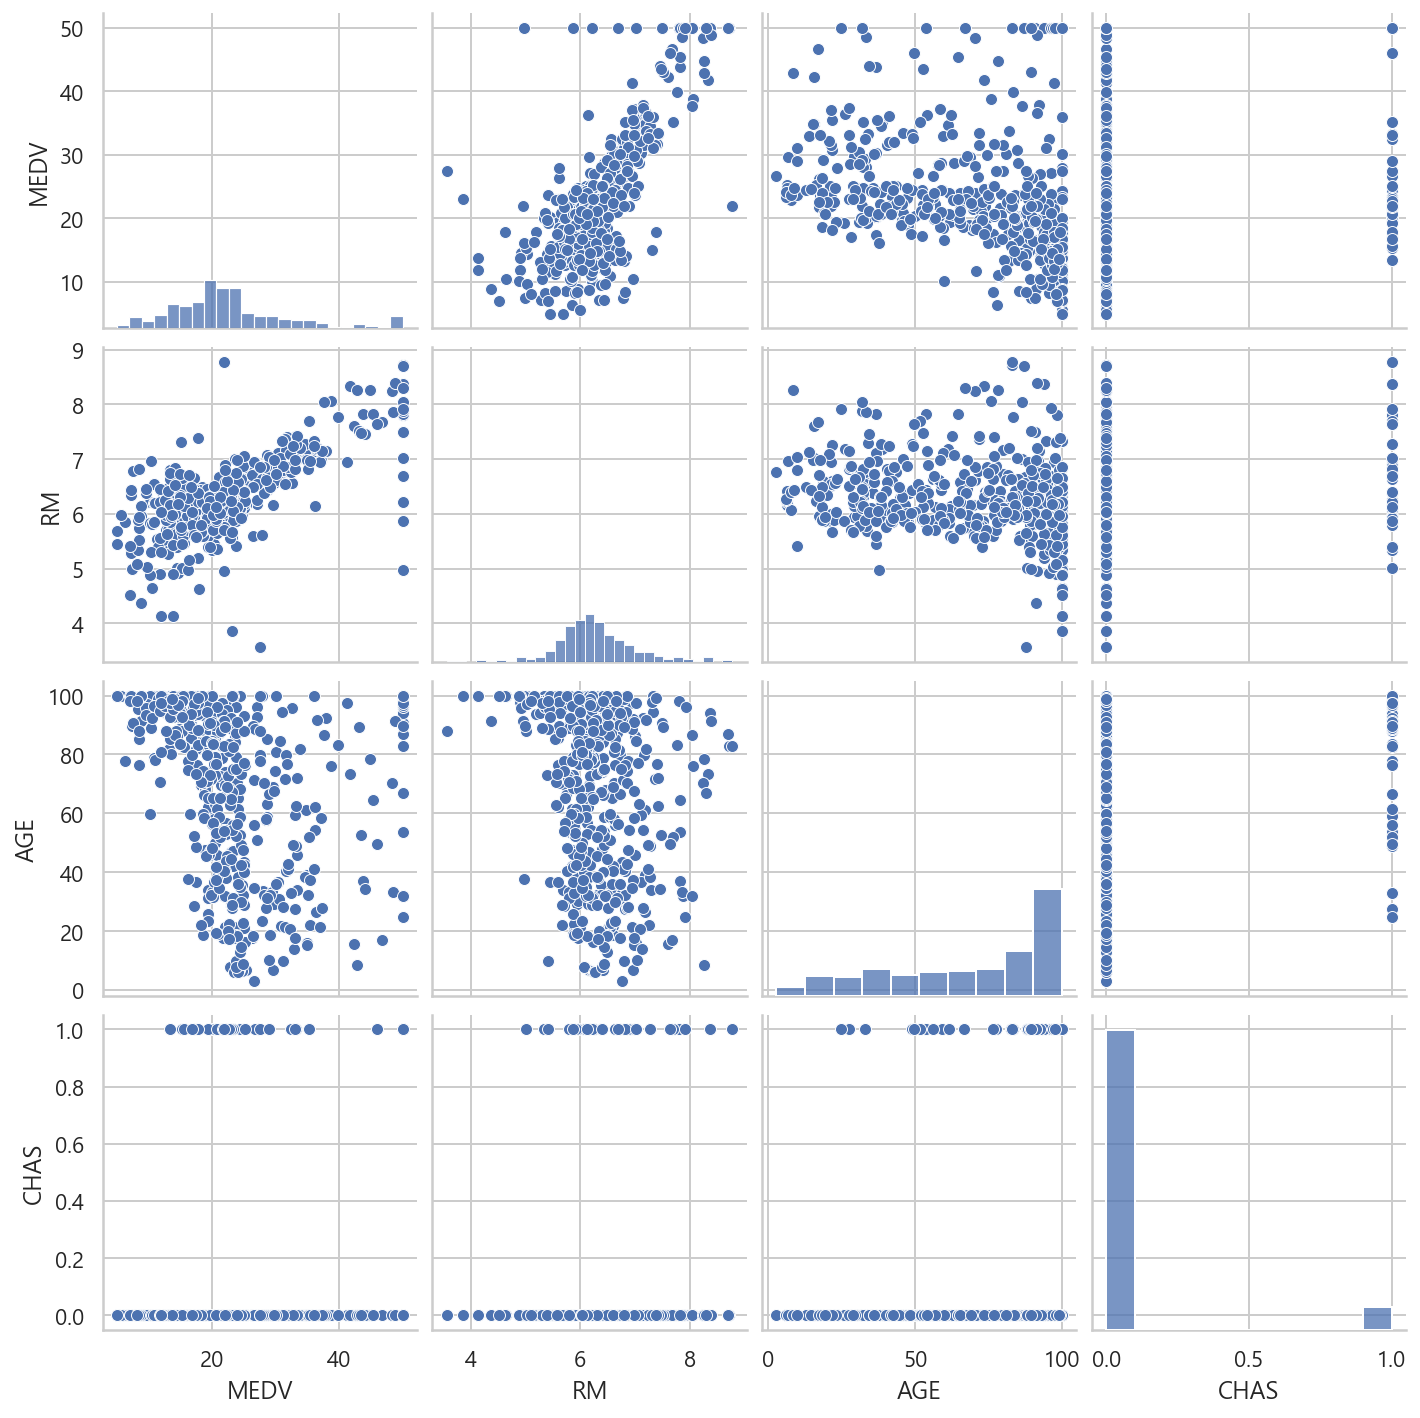

In [16]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show() ; 

## 2. 당뇨병 진행도 예측
- 442명의 당뇨병 환자를 대상으로 한 검사 결과 데이터

### 독립변수 
- age : 나이
- sex : 성별
- bmi : BMI(Body mass index) 지수
- bp : 평균혈압
- s1~s6 : 6종류의 혈액검사 수치

### 종속변수
- 1년 뒤 측정한 당뇨병의 진행률

### 데이터 임포트

In [17]:
from sklearn.datasets import load_diabetes

In [19]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 스캐터 플롯 : 상관관계
- 종속변수인 target 당뇨병 진행률과 양의 상관관계가 있는 것은 bmi와 bp
    - bmi가 커질 수록 진행률도 커진다고 볼 수 있다.
    - bp가 커질 수록 진행률도 커진다고 볼 수 있다.
- bmi와 bp도 양의 상관관계를 갖는다고 볼 수 있다.
    - **다중공선성 multicolinearity** : 독립변수끼리 상관관계를 갖는 것
    - 다중공선성은 회귀분석의 결과에 영향을 미칠 수 있다. 

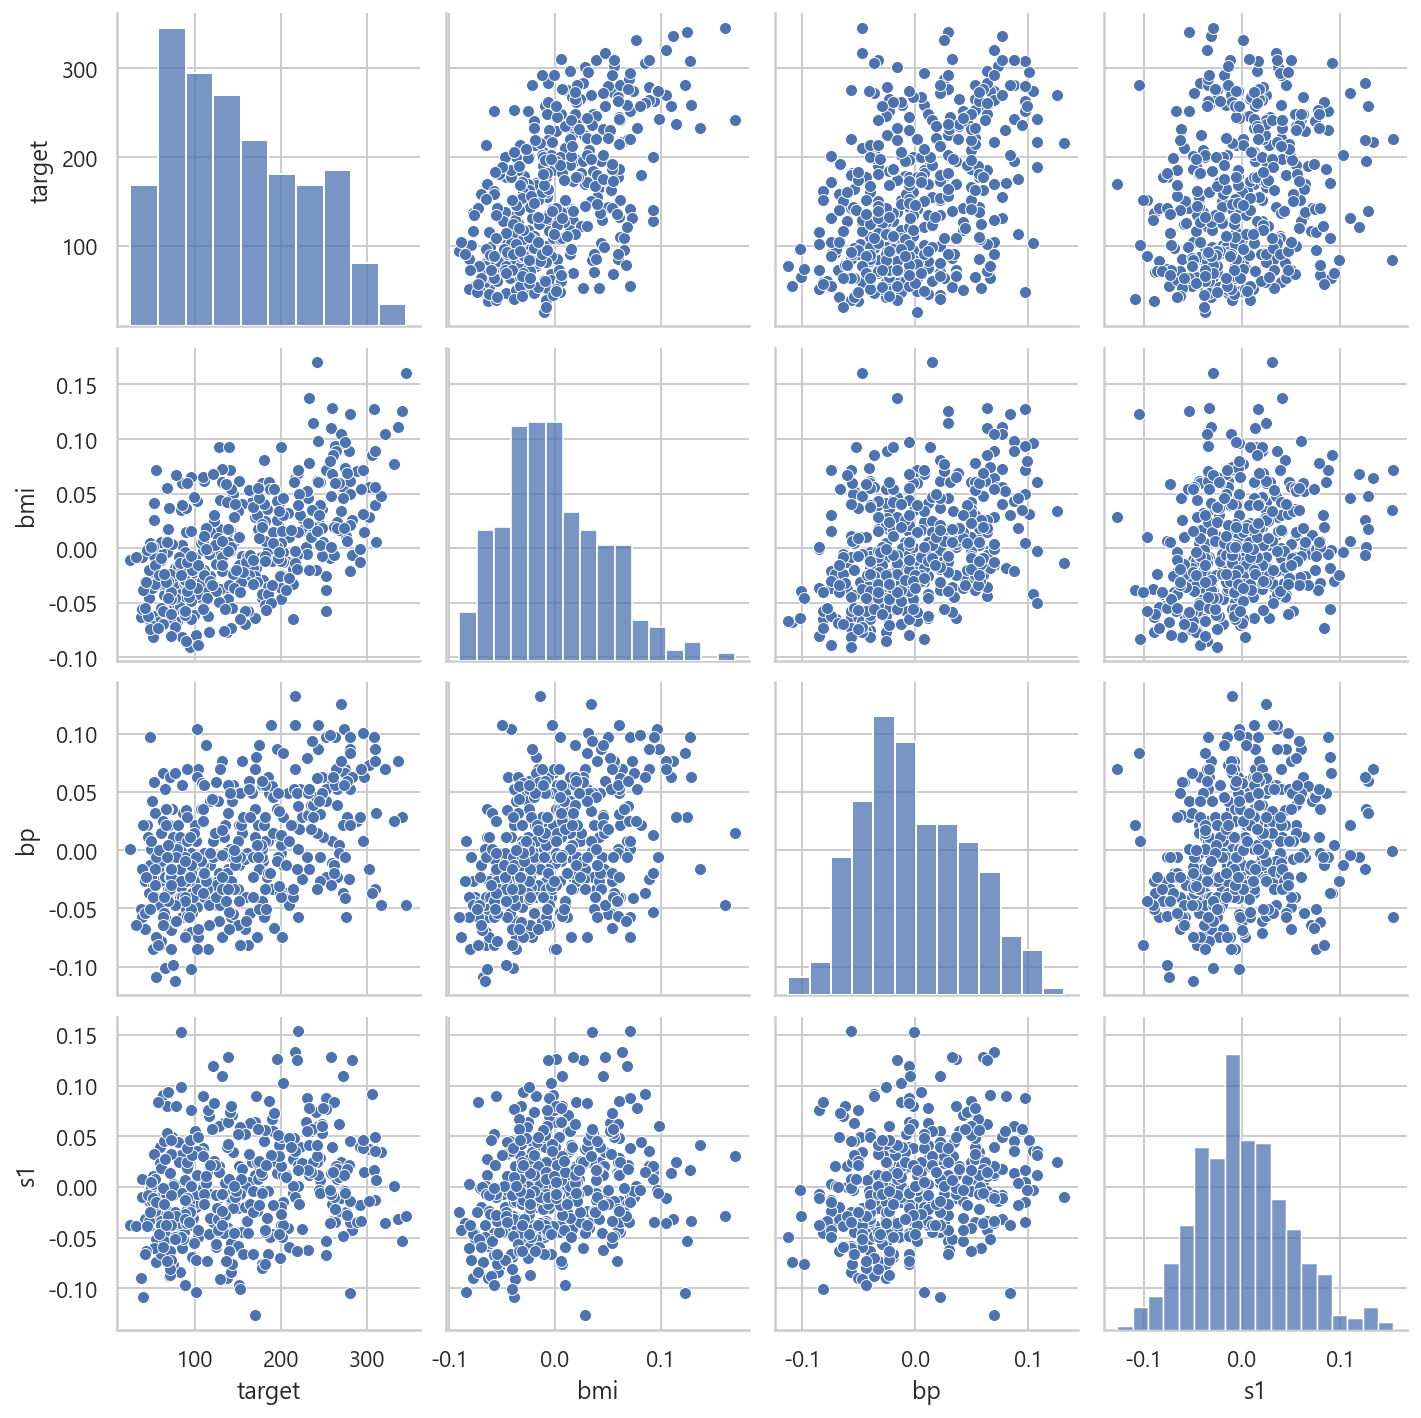

In [20]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show() ; 

## 3. california housing data

In [21]:
from sklearn.datasets import fetch_california_housing

In [22]:
ch = fetch_california_housing()
dir(ch)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [23]:
ch_df = pd.DataFrame(ch.data, columns=ch.feature_names)
ch_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
ch.target_names

['MedHouseVal']

In [25]:
ch_df["target"] = ch.target
ch_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


### 독립변수
- MedInc     : median income in block group
- HouseAge   : median house age in block group
- AveRooms   : average number of rooms per household
- AveBedrms  : average number of bedrooms per household
- Population : block group population
- AveOccup   : average number of household members
- Latitude   : block group latitude
- Longitude  : block group longitude

In [26]:
ch_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [28]:
print(ch.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [29]:
ch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 종속변수와 독립변수의 상관관계
- 종속변수와 상관관계가 있는 독립변수
    - medinc 중산층 소득이 높을 수록 종속변수 값도 커진다.
    - 다른 독립변수와 상관관계는 크게 눈에 띄지 않는다고 볼 수 있다.
- 독립변수간의 상관관계를 의미하는 다중공선성도 크게 눈에 띄지 않는다.    

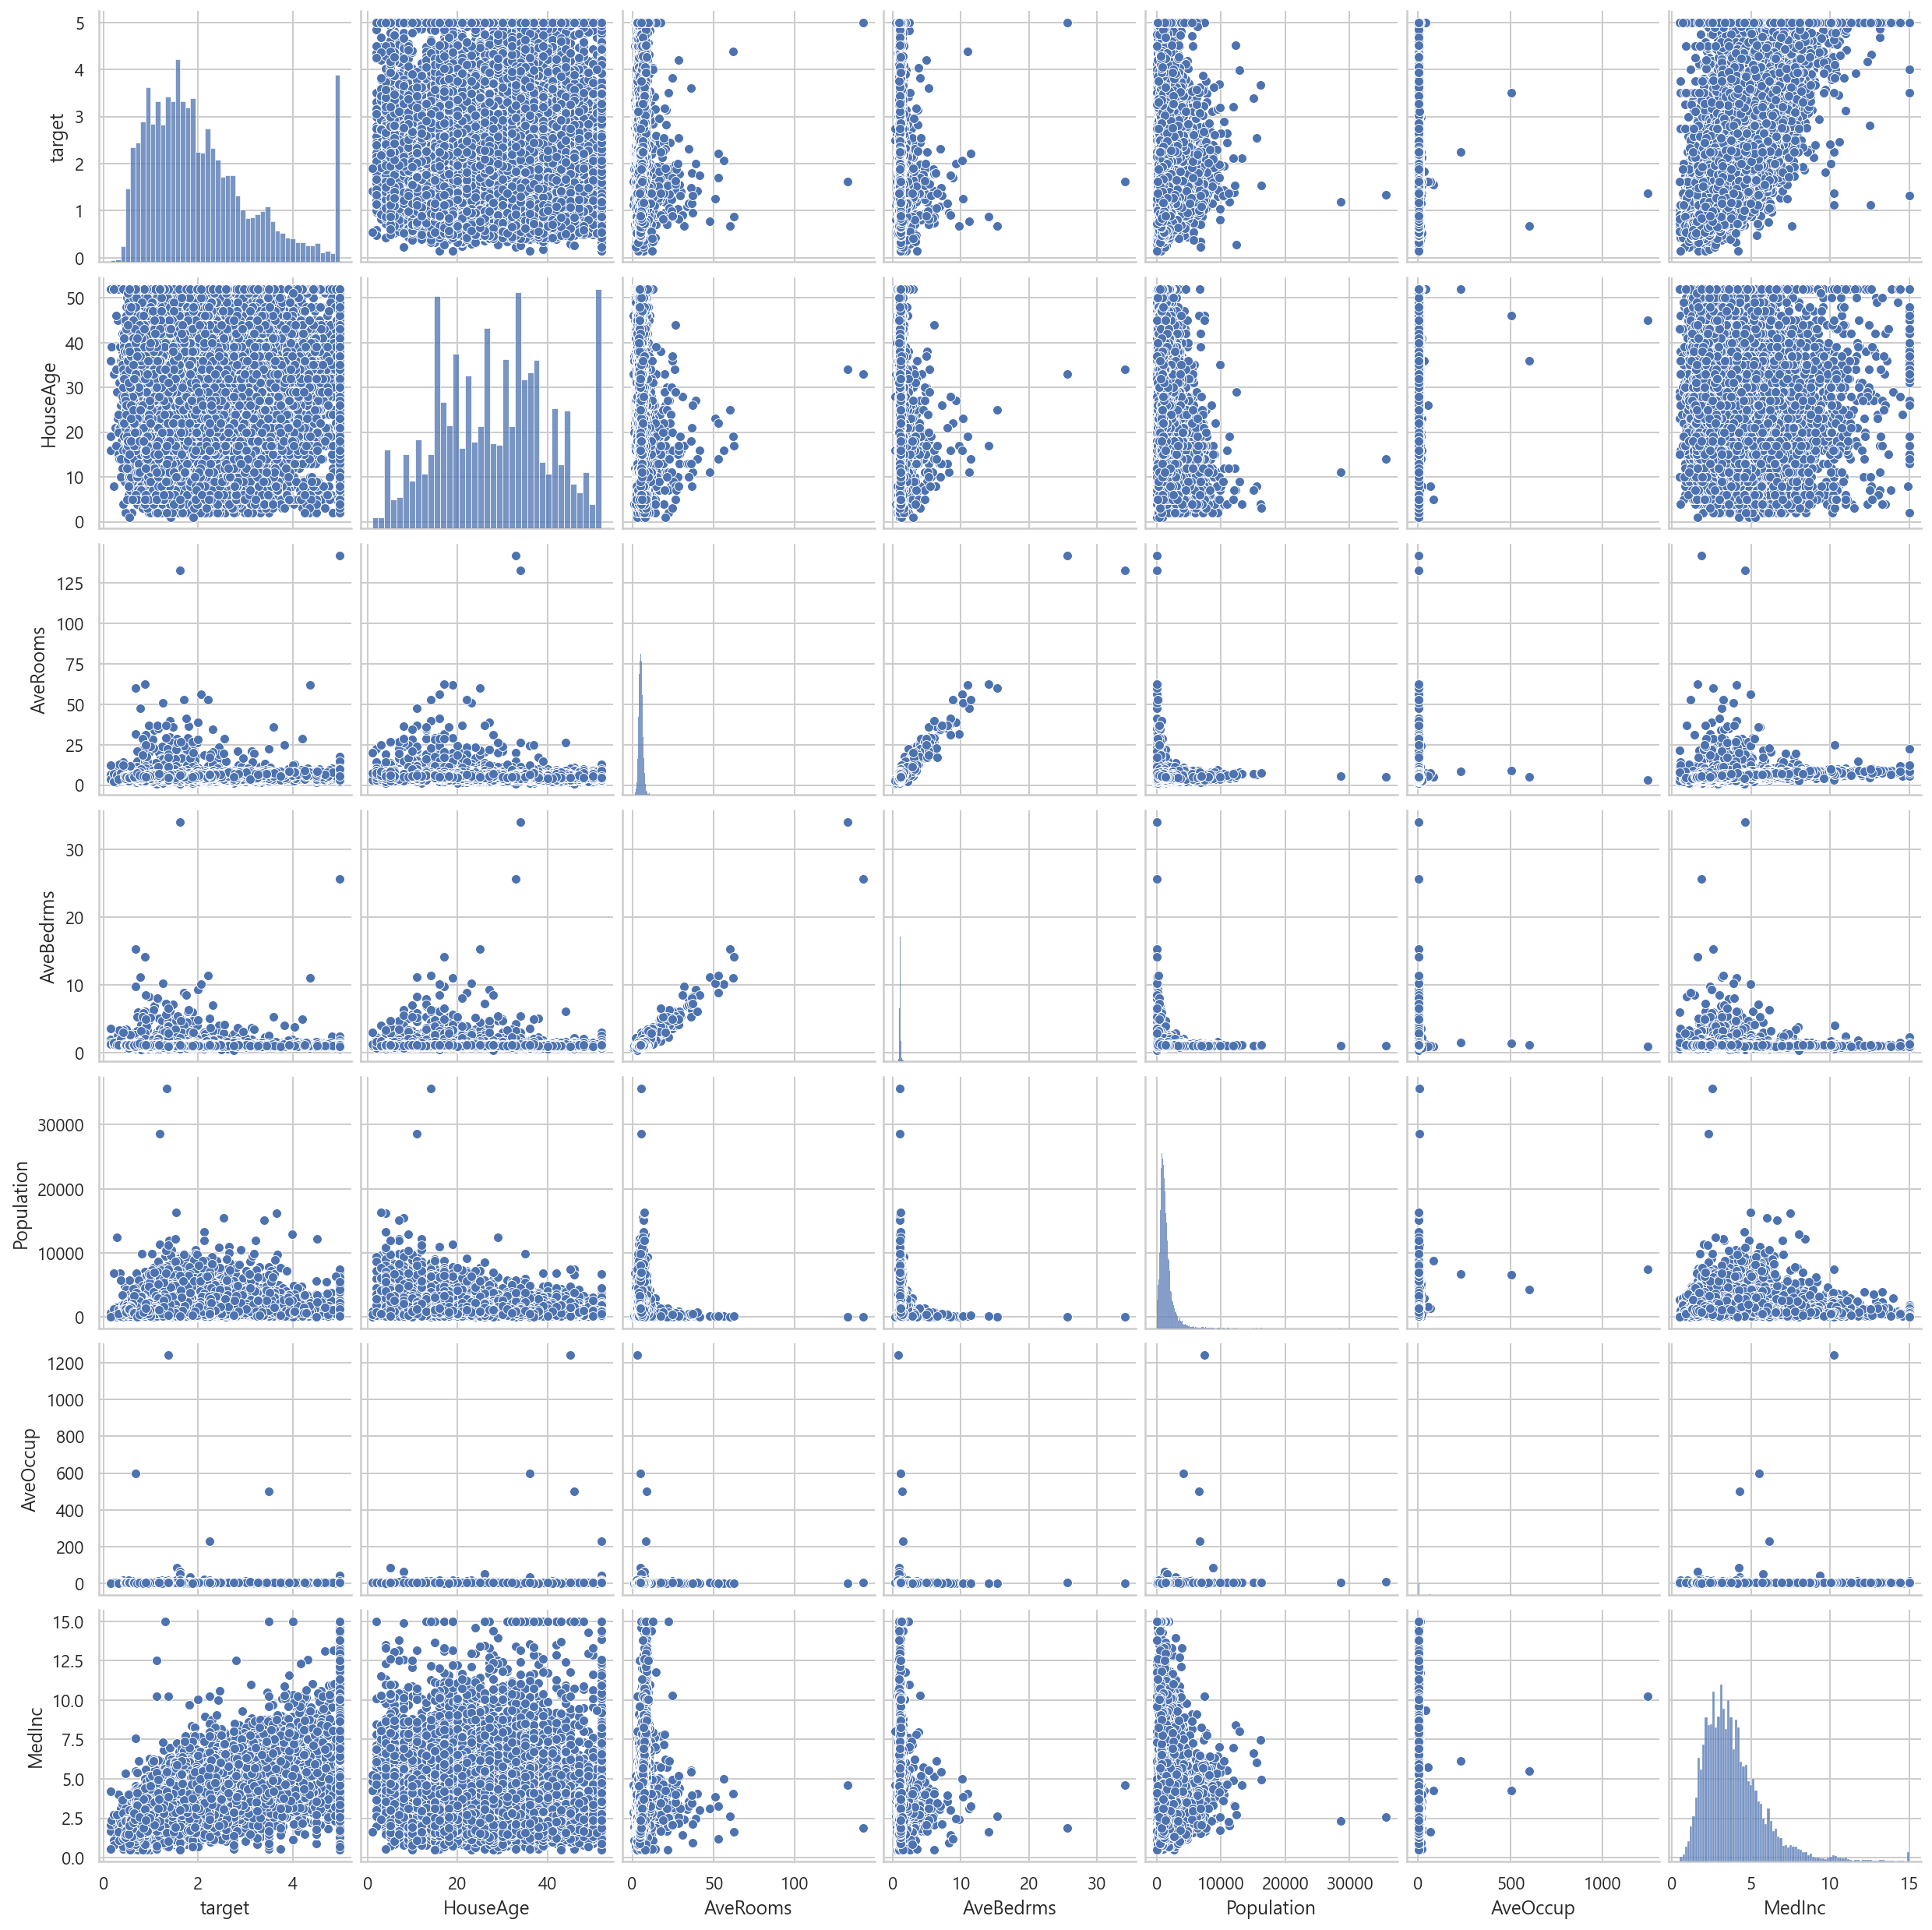

In [33]:
sns.pairplot(ch_df[["target", "HouseAge", "AveRooms", "AveBedrms",
                   "Population", "AveOccup", "MedInc"]])
plt.show() ; 

In [34]:
ch_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [32]:
ch_df.corr().loc["target"]

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
target        1.000000
Name: target, dtype: float64

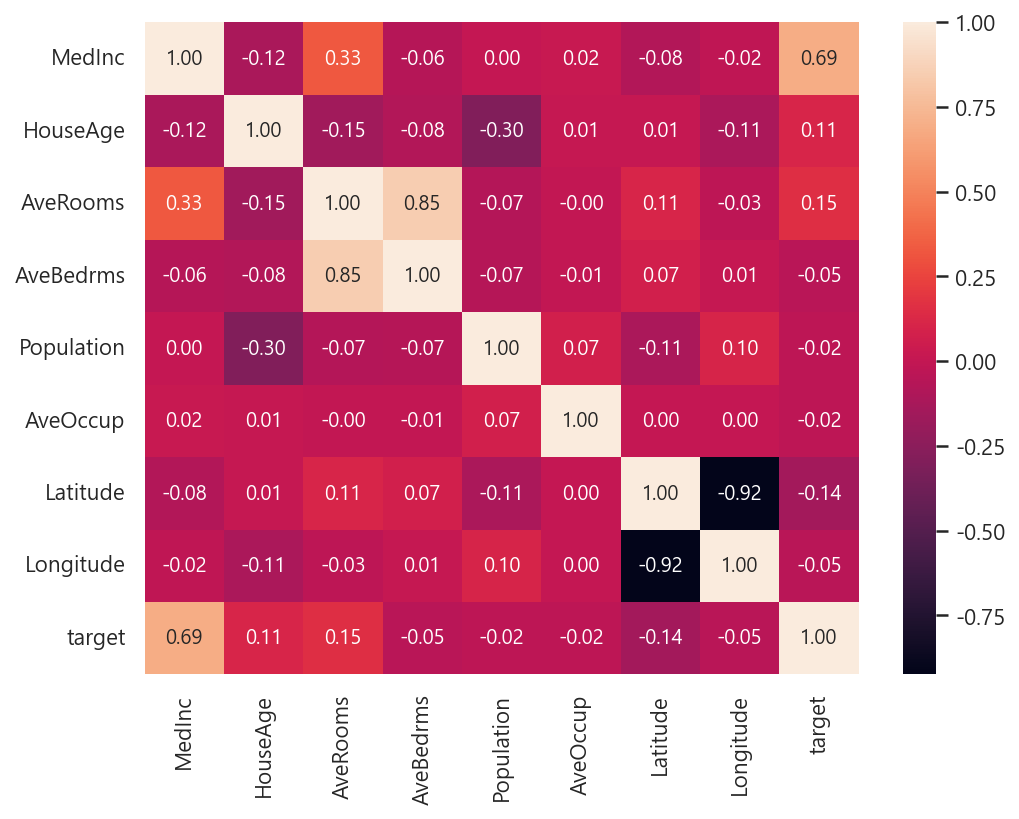

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(ch_df.corr(), annot=True, fmt=".2f")
plt.show() ; 

## 4. 가상 데이터 예측
- make_regerssion() : 가상의 회귀분석 문제를 만들어 준다.
    - n_samples : 정수(디폴트 100) : 표본 데이터 갯수 N
    - n_features : 정수(디폴트 100) : 독립변수(feature)의 수(차원) M
    - bias : 실수(디폴트 0) : y 절편
    - noise : 실수(디폴트 0) : 출력 즉, 종속변수에 더해지는 잡음 epsilon의 표준편차
    - random_state : 정수(디폴트 None) : 난수 발생용 시드값
    - coef : 불리언(디폴트 False) : True이면 선형 모형의 계수 출력
    - n_informative : 정수(디폴트10) : 독립변수 중 실제로 종속변수와 상관관계가 있는 독립변수의 수
    - effective_rank : 정수, None(디폴트 None) : 독립변수 중 서로 독립인 독립변수의 수. 만약 None이면 모두 독립
    - tail_strength : 0~1 사이의 실수(디폴트 0.5)
        - effective_rank가 None이 아닌 경우 독립변수간의 상관관계를 결정하는 변수. 0.5이면 독립변수간의 상관관계가 없다.

### 가상 데이터를 만드는 과정
- 독립변수 데이터 행렬 x를 무작위로 만든다.
- 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위로 만든다.
- x와 w를 내적하고 y절편 b값을 더하여 독립변수와 완전선형인 종속벡터 y_0를 만든다.
- 기댓값이 0이고 표준편차가 noise인 정규분포를 이용하여 잡음 epsilon을 만든다.
- 독립변수와 완전선형인 종속변수 벡터 y_0에 잡음 epsilon을 더해서 종속변수 데이터 y를 만든다.
    - $y = w^Tx + b + \epsilon$

In [1]:
from sklearn.datasets import make_regression

In [2]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100,
                         noise=10, coef=True, random_state=0)

In [3]:
X

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ],
       [ 0.97873798],
       [-0.20515826],
       [ 0.15494743],
       [-0.50965218],
       [ 1.53277921],
       [-0.74216502],
       [-1.45436567],
       [-0.10321885],
       [-2.55298982],
       [ 1.76405235],
       [-1.25279536],
       [-0.97727788],
       [ 0.04575852],
       [-0.4380743 ],
       [ 0.76103773],
       [ 0.14404357],
       [-0.21274028],
       [ 1.20237985],
       [-0.38732682],
       [ 2.2408932 ],
       [ 0.77749036],
       [ 0.15634897],
       [-1.61389785],
       [ 1.9507754 ],
       [ 0.40015721],
       [ 1.46935877],
       [ 1.45427351],
       [-0.30230275],
       [ 0.3130677 ],
       [ 0.33367433],
       [ 2.26975462],
       [-0.15135721],
       [ 0.12167502],
       [ 0.37816252],
       [ 0.6536186 ],
       [ 0

In [4]:
y

array([ 69.16576208, 129.94932345,  80.01389923, 100.30585701,
       107.20314663, 140.88561123, 112.99506826,  82.25108224,
        71.56780523, 111.67769684, 112.48530888, 114.65029223,
       111.71570029, 101.63406761, 127.78240131,  93.08609825,
        80.69164687, 113.11903254,  61.0218126 , 131.15670173,
        91.08078405,  79.88503003,  90.81838842,  95.10877879,
       108.56190647,  98.64651153,  96.63568503, 125.15577947,
        98.56417169, 131.95814648, 121.75870162, 106.25707916,
        80.40782312, 128.46531432,  98.60107781, 110.84947303,
       116.3307515 , 103.39347869, 106.6868286 , 103.97656433,
       127.6988851 ,  97.31416893,  94.52678796,  96.96377225,
       101.80069439, 119.35745   , 118.85230744, 104.32382223,
        92.40639334,  83.7664334 ])

In [5]:
w

array(15.89695836)

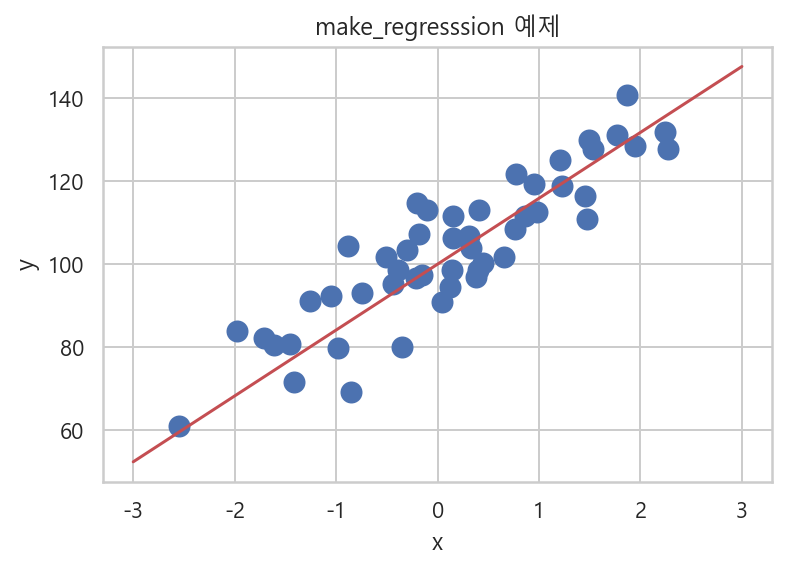

In [7]:
%matplotlib inline

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regresssion 예제")
plt.show() ; 

### 독립변수가 2개인 표본 데이터
- n_sampels=300 : 표본데이터 갯수 (행의 갯수, 열벡터의 차원)
- n_features=2 : 독립변수가 2개 (열의 갯수)
- noise=10 : 잡음값 10 (epsilon)
- coef=True : 항상 가중치 계수 반환
- random_state=0 : 

In [8]:
from sklearn.datasets import make_regression

In [13]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10,
                         coef=True)

In [15]:
X.shape

(300, 2)

In [17]:
y.shape

(300,)

In [18]:
w

array([82.53304838, 91.6485816 ])

#### 종속변수와 독립변수의 상관관계
- 두개의 독립변수가 종속변수와 상관관계를 갖는 경우
    - 두개의 독립변수 x1,x2가 커질 수록 종속변수의 값도 커진다.
    - 색이 밝아질 수록 종속변수의 값이 커진다.

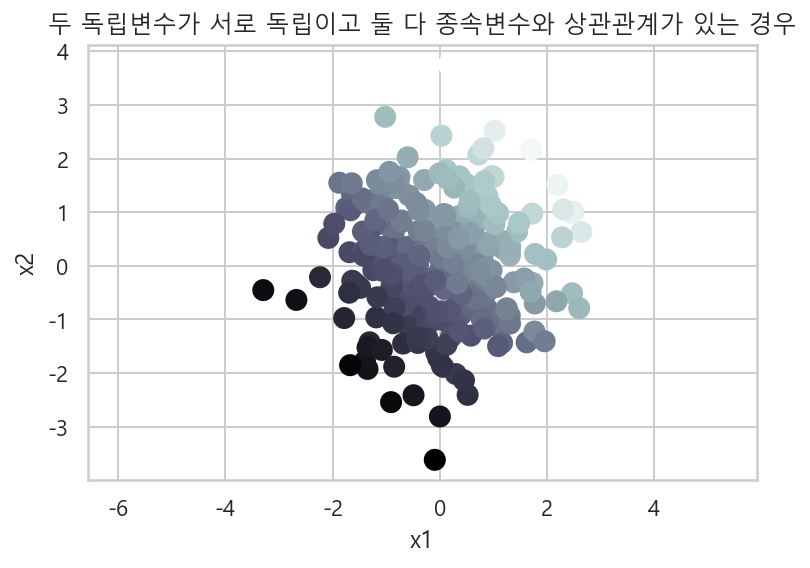

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관관계가 있는 경우")
plt.show() ; 

#### 하나의 독립변수만 종속변수와 상관관계를 갖는 경우
- make_regression() 명령어의 인수 n_informative=1로 설정
- 종속변수와 상관관계가 있는 독립변수의 갯수 1

In [20]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1,
                         noise=0, coef=True, random_state=0)

In [21]:
X

array([[-0.15135721,  0.95008842],
       [ 0.38728048, -1.69810582],
       [ 1.41232771,  0.93674246],
       [ 0.34965446,  0.5785215 ],
       [-1.53624369,  0.46566244],
       [ 0.49600095,  1.12859406],
       [-0.14963454, -0.69456786],
       [ 0.33996498,  0.93184837],
       [ 1.29784579, -0.67802578],
       [ 0.40149906, -2.23960406],
       [ 0.84436298, -1.22543552],
       [ 0.4105985 , -0.10321885],
       [-0.88897136, -1.68121822],
       [ 1.84926373, -0.43515355],
       [ 0.82350415,  0.77179055],
       [ 0.78495752, -1.13980246],
       [ 0.08842209,  0.52389102],
       [-1.41690611, -0.46684555],
       [ 0.61037938, -1.5829384 ],
       [ 0.00529265,  0.82158571],
       [ 0.12167502,  0.76103773],
       [-0.1103893 , -0.78262916],
       [-0.4380743 , -0.50965218],
       [ 1.29802197,  1.10028434],
       [-0.52118931, -0.6522936 ],
       [ 0.15634897, -0.34791215],
       [ 1.71958931,  1.51999486],
       [ 0.99439439,  1.73887268],
       [-1.15942052,

In [22]:
y

array([  53.98569544,  -96.48936025,   53.22735485,   32.87260933,
         26.4597591 ,   64.12870036,  -39.46656779,   52.94926408,
        -38.5266178 , -127.2582429 ,  -69.63140217,   -5.86507676,
        -95.52977688,  -24.7261904 ,   43.85449698,  -64.76558085,
         29.76840969,  -26.52698528,  -89.94534471,   46.68394563,
         43.24350249,  -44.47036557,  -28.95933363,   62.5200919 ,
        -37.06446997,  -19.76898043,   86.36878222,   98.80580485,
        -22.45760615,  -54.31847679,  -37.50556139,  -38.86670264,
        -54.57754884,   21.74753004,  111.13837852,   -6.71428894,
        -74.23915438,  109.26494911,   29.73350049,  -65.20118765,
        -12.64884644,   29.60782302,  -36.57153001,  -10.83326693,
        -15.22842305, -100.49146628,  -30.84634416,  -53.66509789,
        -57.84693046,  -46.20440237,   52.3248185 ,  114.28314318,
         49.11878568, -128.16512788,  -37.42013821,  -41.42560017,
          8.89297684,   36.55425973, -134.64409693,  -16.58271

In [23]:
w

array([ 0.        , 56.82175937])

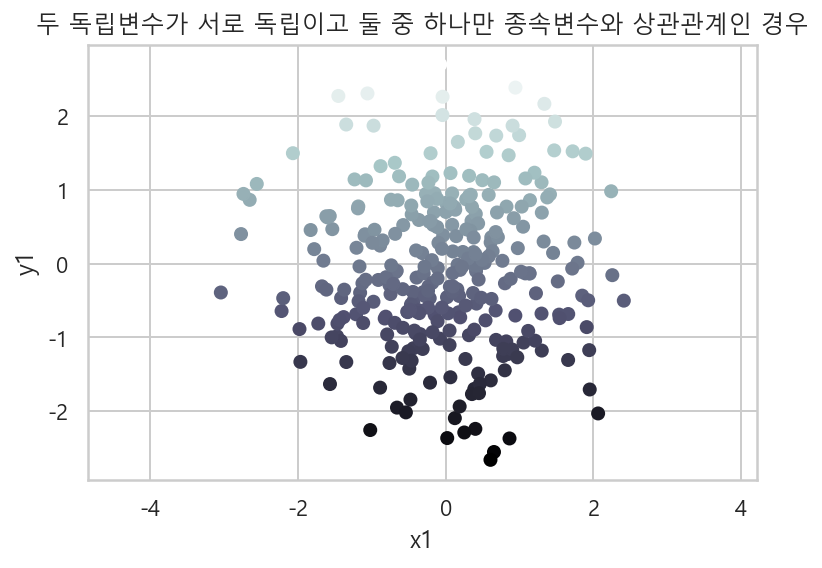

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("y1")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관관계인 경우")
plt.show() ; 